# Basic Usage

In [1]:
# This path append is just for testing from within the examples folder, no need for the user to add this
import sys
sys.path.append("/home/hweiner/Internship/CoMET_rams_devel/")

import CoMET
%load_ext autoreload


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

===============Welcome To CoMET===============

A toolkit of the Advanced Study of Cloud and Environment iNTerations (ASCENT) program.

This project was supported by the U.S. Department of Energy (DOE) Early Career Research Program, Atmospheric System Research (ASR) program, and the Office of Workforce Development for Teachers and Scientists (WDTS) under the Science Undergraduate Laboratory Internships Program (SULI).

If you are using this software for a publication, please cite: ####




In [11]:
# This cell is uncessary. It just illustrates the CONFIG loading
CONFIG = CoMET.CoMET_load(path_to_config="./example_configs/boilerplate.yml")

=====WRF Setup Found in CONFIG=====
[30, 40, 50, 60]
<class 'list'>
[<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]


In [22]:
import tobac
from CoMET.wrf_load import wrf_load_netcdf_iris
import numpy as np
%autoreload 2

def find_nearest(array, pivot):
    array = np.asarray(array)
    idx = (np.abs(array - pivot)).argmin()
    return idx
cube, xarr = wrf_load_netcdf_iris("/share/D3/data/hweiner/WRF/TestingPurposesOnly/*", "DBZ", CONFIG)

print(np.sum(xarr.DBZ.values != -30))
print(np.sum(xarr.DBZ.values == -30))
print(np.max(xarr.DBZ.values))

wrf reflectivity is <xarray.DataArray (Time: 4, bottom_top: 44, south_north: 128, west_east: 148)> Size: 27MB
dask.array<xarray-<this-array>, shape=(4, 44, 128, 148), dtype=float64, chunksize=(1, 44, 128, 148), chunktype=numpy.ndarray>
Coordinates:
    XLAT     (Time, south_north, west_east) float32 303kB dask.array<chunksize=(1, 128, 148), meta=np.ndarray>
    XLONG    (Time, south_north, west_east) float32 303kB dask.array<chunksize=(1, 128, 148), meta=np.ndarray>
    XTIME    (Time) datetime64[ns] 32B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  radar reflectivity
    units:        dBZ
    stagger:      
    coordinates:  XLONG XLAT XTIME
1536
3332608
-0.42042663192070256


In [15]:
# This is the only function required to run CoMET. All details are in the CONFIG
import CoMET
%autoreload 2

output = CoMET.CoMET_start(path_to_config="./example_configs/boilerplate.yml")

=====WRF Setup Found in CONFIG=====
=====Loading WRF Data=====
on line 61 of wrfxarray the xtimes are <xarray.DataArray 'XTIME' (Time: 4)> Size: 32B
dask.array<concatenate, shape=(4,), dtype=datetime64[ns], chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    XTIME    (Time) datetime64[ns] 32B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: Time
Attributes:
    FieldType:    104
    MemoryOrder:  0  
    description:  minutes since 2023-06-20 00:00:00
    stagger:      
=====Starting WRF tobac Feature ID=====
on line 92 of wrf_tobac the feat_cube is DBZ / (dBZ)                         (time: 4; altitude: 44; south_north: 128; west_east: 148)
    Dimension coordinates:
        time                             x            -                -               -
        altitude                         -            x                -               -
        south_north                      -            -                x               -
        west_east      

Process Process-14:
Traceback (most recent call last):
  File "/usr/lib64/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib64/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hweiner/Internship/CoMET_rams_devel/examples/../CoMET/user_interface_layer.py", line 593, in run_wrf
    user_return_dict, tracking_info = run_tracker('wrf', 'tobac', user_return_dict, tracking_info, CONFIG)
                                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/hweiner/Internship/CoMET_rams_devel/examples/../CoMET/run_tracker_wrapper.py", line 650, in run_tracker
    user_return_dict = _tobac_analysis(
                       ^^^^^^^^^^^^^^^^
  File "/home/hweiner/Internship/CoMET_rams_devel/examples/../CoMET/run_tracker_wrapper.py", line 421, in _tobac_analysis
    _tobac_analysis_data[var] = calc_var(
                                ^^

KeyboardInterrupt: 

In [5]:
analysis = output['mesonh']['tobac']['analysis']

for k in analysis.keys():
    if k != "merge_split":
        print(analysis[k].head())

import numpy as np
print(sum(~np.isnan(analysis['area-high']['area'])))

   frame  feature_id  cell_id       eth
0      2           0        0  2.848868
1      2           1        1  3.466485
   frame  feature_id  cell_id  perimeter
0      2           0        0  38.974433
1      2           1        1  63.465023
   frame  feature_id  cell_id     volume
0      2           0        0  14.817527
1      2           1        1  30.979157
   frame  feature_id  cell_id  max_intensity
0      2           0        0      21.271116
1      2           1        1      22.586998
   frame  feature_id  cell_id         velocity  speed
0      2           0        0  (0.0, 0.0, 0.0)      0
1      2           1        1  (0.0, 0.0, 0.0)      0
   frame  feature_id  cell_id  cell_growth
0      2           0        0          NaN
1      2           1        1          NaN
   frame  feature_id  cell_id  area
0      2           0        0   4.5
1      2           1        1   9.0
   frame  feature_id  cell_id  area
0      2           0        0   NaN
1      2           1        

In [6]:
print(output['nexrad']['tobac']['analysis']['area-low'])
print(output["wrf"]["tobac"]["analysis"]["area-low"])

      frame  feature_id  cell_id   area
0        14           0        0   49.0
1        33           1        1   58.0
2        33           2        2  310.0
3        34           3        2  400.0
4        35           4        2  417.0
...     ...         ...      ...    ...
6454    179        6454     2494  215.0
6455    180        6455     2490  495.0
6456    180        6456     2495  300.0
6457    180        6457     2489  546.0
6458    180        6458     2496  796.0

[6459 rows x 4 columns]
      frame  feature_id  cell_id  area
0        11           0        0  13.0
1        12           1        0  12.0
2        13           2        0   6.0
3        68           3        1   NaN
4        69           4        1   NaN
...     ...         ...      ...   ...
1511    253        1511      436  20.0
1512    253        1512      437  25.0
1513    254        1513      437  18.0
1514    254        1514      436  19.0
1515    255        1515      437  25.0

[1516 rows x 4 columns]


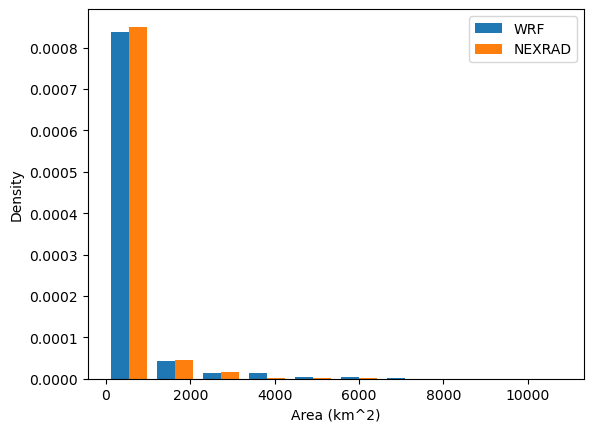

In [5]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.hist([output['wrf']['tobac']['analysis']['area-low'].area.values,output['nexrad']['tobac']['analysis']['area-low'].area.values],density=True,label=["WRF","NEXRAD"])
ax.set_xlabel("Area (km^2)")
ax.set_ylabel("Density")
ax.legend()
plt.show()